# PRCP-1010-InsClaimPred

## Problem Statement

This is an Insurance Claim Prediction Data Set. The bigger scope is to account for inaccuracies in the cost of insurance policies. A cautious driver should get a better price compared to a reckless driver. The target here is to build a Machine Learning model that predicts the probability that a driver will initiate an insurance claim in the following year.

## Dataset Description

Risk varies widely from customer to customer, and a deep understanding of different risk factors helps predict the likelihood and cost of insurance claims. The goal of this competition is to better predict Insurance claim payments based on the certain characteristics.

Due to privacy concerns, the company has not shared the names of the features. You can skip the EDA part and move directly towards the modelling.
The train set has 595212 observations with 59 features.

## Business case: To predict the probability that a driver will initiate an insurance claim in the following year.

In [52]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')

from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import precision_score,recall_score,roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the data
#insurance_dataset = pd.read_csv('./Data/train.csv')
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/MyDrive/train.csv'
insurance_dataset = pd.read_csv(url)

Mounted at /content/drive


### Basic Checks

In [5]:
insurance_dataset.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
pd.set_option('display.max_columns', 59)
insurance_dataset.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [8]:
insurance_dataset.shape

(595212, 59)

Observations from Basic checks:
1. All the features are numerical.
2. There are totally 59 features and 595212 rows in the provided dataset
3. There are many categorical features in the dataset with numeric values.
4. There are many columns with minimum value as -1.

### As per Dataset description, feature names are not available, so skipping the EDA part

### Data Preprocessing and Feature Engineering 

In [9]:
# Checking for total number of duplicates without considering id column as that column is useless
insurance_dataset[insurance_dataset.columns[1:]].duplicated().sum()

0

There are no Duplicate rows in the provided dataset.

In [10]:
# Check missing values.Check for corrupted values if any.
insurance_dataset.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


There is no missing values in the provided dataset

In [11]:
# Creating a dataframe to find the numerical and categorical columns based on Distinct counts 
n_unique = []
features = []
dtype = []
for cols in insurance_dataset.columns:
        features.append(cols)
        n_unique.append(insurance_dataset[cols].nunique())
        dtype.append(insurance_dataset[cols].dtype)
df_distinct = pd.DataFrame()
df_distinct['Feature_name'] = features
df_distinct['n_unique'] = n_unique
df_distinct['dtype'] = dtype
df_distinct = df_distinct.sort_values(by="n_unique",ascending=False).reset_index(drop= True)
df_distinct

,Feature_name,n_unique,dtype
0,id,595212,int64
1,ps_car_13,70482,float64
2,ps_reg_03,5013,float64
3,ps_car_14,850,float64
4,ps_car_12,184,float64
5,ps_car_11_cat,104,int64
6,ps_calc_10,26,int64
7,ps_calc_14,24,int64
8,ps_calc_11,20,int64
9,ps_reg_02,19,float64


In [12]:
insurance_dataset['ps_car_11_cat'].unique()

array([ 12,  19,  60, 104,  82,  99,  30,  68,  20,  36, 101, 103,  41,
        59,  43,  64,  29,  95,  24,   5,  28,  87,  66,  10,  26,  54,
        32,  38,  83,  89,  49,  93,   1,  22,  85,  78,  31,  34,   7,
         8,   3,  46,  27,  25,  61,  16,  69,  40,  76,  39,  88,  42,
        75,  91,  23,   2,  71,  90,  80,  44,  92,  72,  96,  86,  62,
        33,  67,  73,  77,  18,  21,  74,  37,  48,  70,  13,  15, 102,
        53,  65, 100,  51,  79,  52,  63,  94,   6,  57,  35,  98,  56,
        97,  55,  84,  50,   4,  58,   9,  17,  11,  45,  14,  81,  47])

Observations:
1. ID column has more distinct values. Since that is unwanted column for this prediction,will be removed from the dataset.
2. ps_car_13, ps_reg_03, ps_car_14 and ps_car_12 has been considered as numerical column as these columns have more distinct value with datatype as float
3. ps_car_11_cat consist of values between 1 and 103 and the values are integer, hence considering this as categorical variable

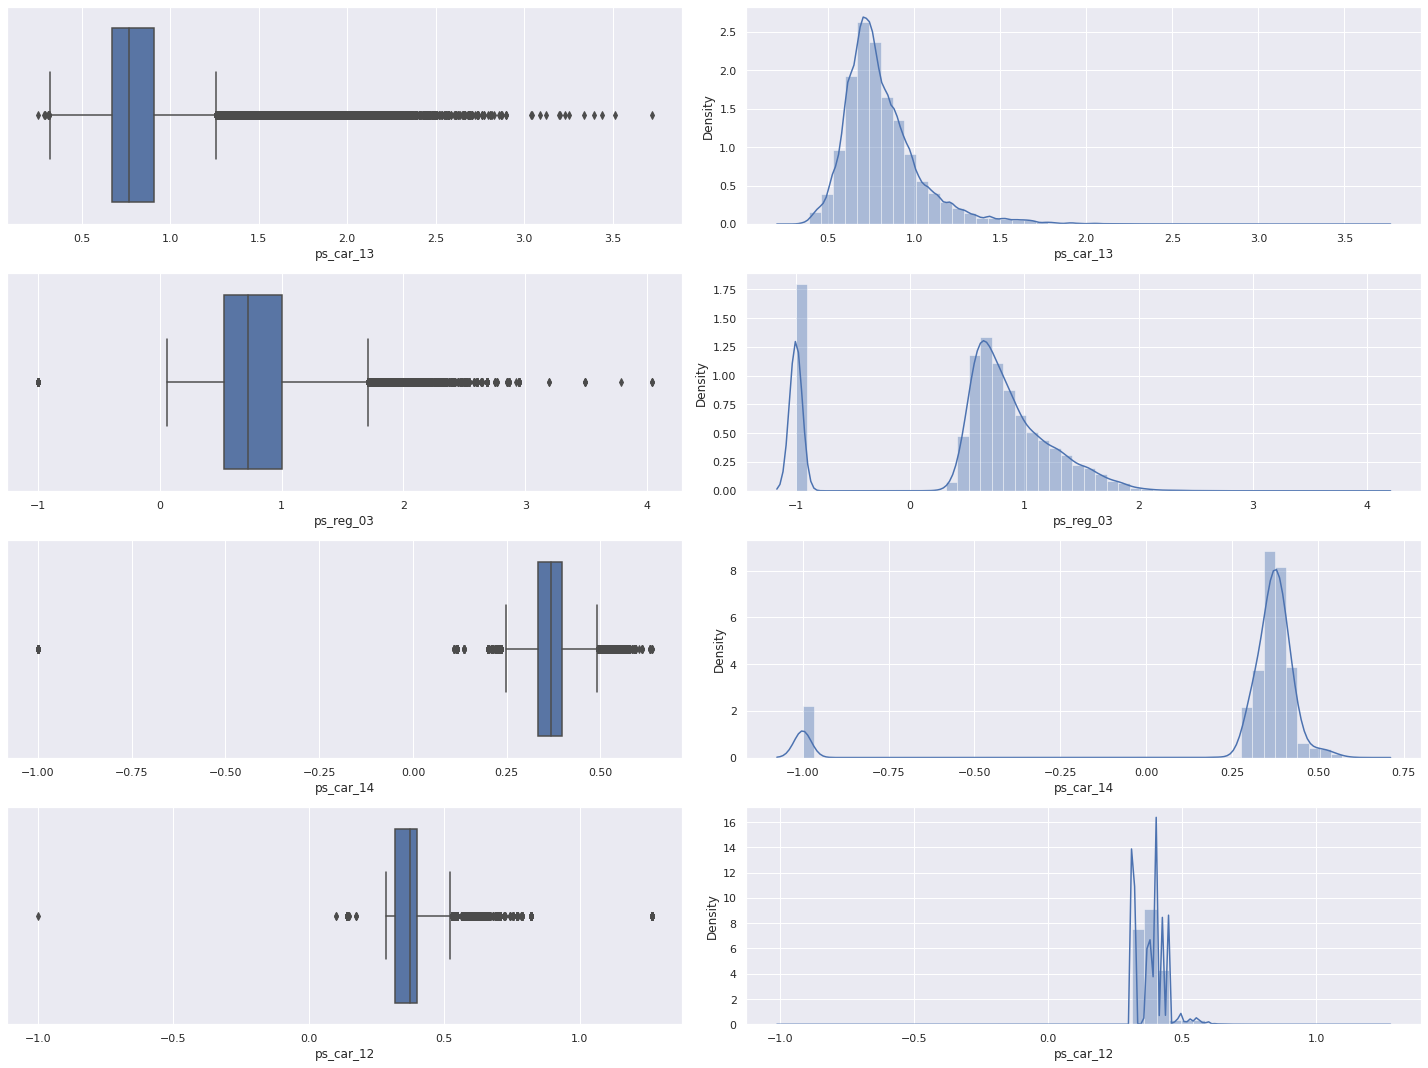

In [13]:
#checking the outliers for numerical columns
# As ps_car_13, ps_reg_03, ps_car_14 and ps_car_12 has be considered as numerical column, creating a list to check outliers
numerical = ['ps_car_13','ps_reg_03','ps_car_14','ps_car_12']
plt.figure(figsize=(20,15))
plotnumber = 1
for column in numerical:
    ax = plt.subplot(4,2,plotnumber)
    sns.boxplot(insurance_dataset[column])
    plotnumber += 1
    ax = plt.subplot(4,2,plotnumber)
    sns.distplot(insurance_dataset[column])
    plotnumber += 1
plt.tight_layout()
plt.show()

Observations:
1. ps_car_13 column, there are many outliers with values less than 0.5 and more than 1.5
2. ps_reg_03 column has more number of -1 values and the data is right skewed.
3. ps_car_14 column also have more number of rows with -1 value
4. ps_car_12 column have many outliers. column has value more than 1 and -1 value.

In [14]:
# Checking total number of Negative values in the numerical columns
for i in numerical:
  print(f'Total number of negative values in {i} column: {insurance_dataset[insurance_dataset[i] < 0].shape[0]}')

Total number of negative values in ps_car_13 column: 0
Total number of negative values in ps_reg_03 column: 107772
Total number of negative values in ps_car_14 column: 42620
Total number of negative values in ps_car_12 column: 1


In [15]:
# Replacing negative values of numerical columns with mean of positive values present in numerical columns
df = insurance_dataset
for i in numerical:
  df.loc[(df[i] < 0),i] = (df[i] >= 0).mean()

In [16]:
# Checking total number of Negative values in the modified dataset
for i in numerical:
  print(f'Total number of negative values in {i} column: {df[df[i] < 0].shape[0]}')

Total number of negative values in ps_car_13 column: 0
Total number of negative values in ps_reg_03 column: 0
Total number of negative values in ps_car_14 column: 0
Total number of negative values in ps_car_12 column: 0


In [17]:
# Outlier detection using IQR method for numerical features
Q1_df = []
Q3_df = []
IQR_df = []
lower_limit_df = []
upper_limit_df = []
below_lowerlimit_total_rows_df = []
above_upperlimit_total_rows_df =  []
for cols in numerical:
    Q1 = df[cols].quantile(0.25)
    Q1_df.append(Q1)
    Q3 = df[cols].quantile(0.75)
    Q3_df.append(Q3)
    IQR = Q3 - Q1
    IQR_df.append(IQR)
    lower_limit = Q1 - 1.5 * IQR
    lower_limit_df.append(lower_limit)
    upper_limit = Q3 + 1.5 * IQR
    upper_limit_df.append(upper_limit)
    below_lowerlimit_total_rows = (df[cols] < lower_limit).sum()
    below_lowerlimit_total_rows_df.append(below_lowerlimit_total_rows)
    above_upperlimit_total_rows = (df[cols] > upper_limit).sum()
    above_upperlimit_total_rows_df.append(above_upperlimit_total_rows)
df_list = list(zip(Q1_df,Q3_df,IQR_df,lower_limit_df,upper_limit_df,below_lowerlimit_total_rows_df,above_upperlimit_total_rows_df))
df_outliers = pd.DataFrame(df_list,columns=['Q1','Q3','IQR','lower_limit','upper_limit',\
                                            'below_lowerlimit_total_rows','above_upperlimit_total_rows'], index = numerical)
df_outliers

,Q1,Q3,IQR,lower_limit,upper_limit,below_lowerlimit_total_rows,above_upperlimit_total_rows
ps_car_13,0.670867,0.906190,0.235324,0.317881,1.259176,13,26900
ps_reg_03,0.666615,1.000000,0.333385,0.166536,1.500078,45,35469
ps_car_14,0.353553,0.406202,0.052649,0.274581,0.485175,868,58562
ps_car_12,0.316228,0.400000,0.083772,0.190569,0.525658,60,15296


In [18]:
# Checking the total number of outliers found by IQR method
total_outliers = df_outliers['below_lowerlimit_total_rows'].sum() + df_outliers['above_upperlimit_total_rows'].sum()
print('Total number of outliers : ',total_outliers)
print('We have {:.2f}% of data with outliers'.format(total_outliers/df.shape[0]*100))

Total number of outliers :  137213
We have 23.05% of data with outliers


No need to remove outliers as it have 23% of data from the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

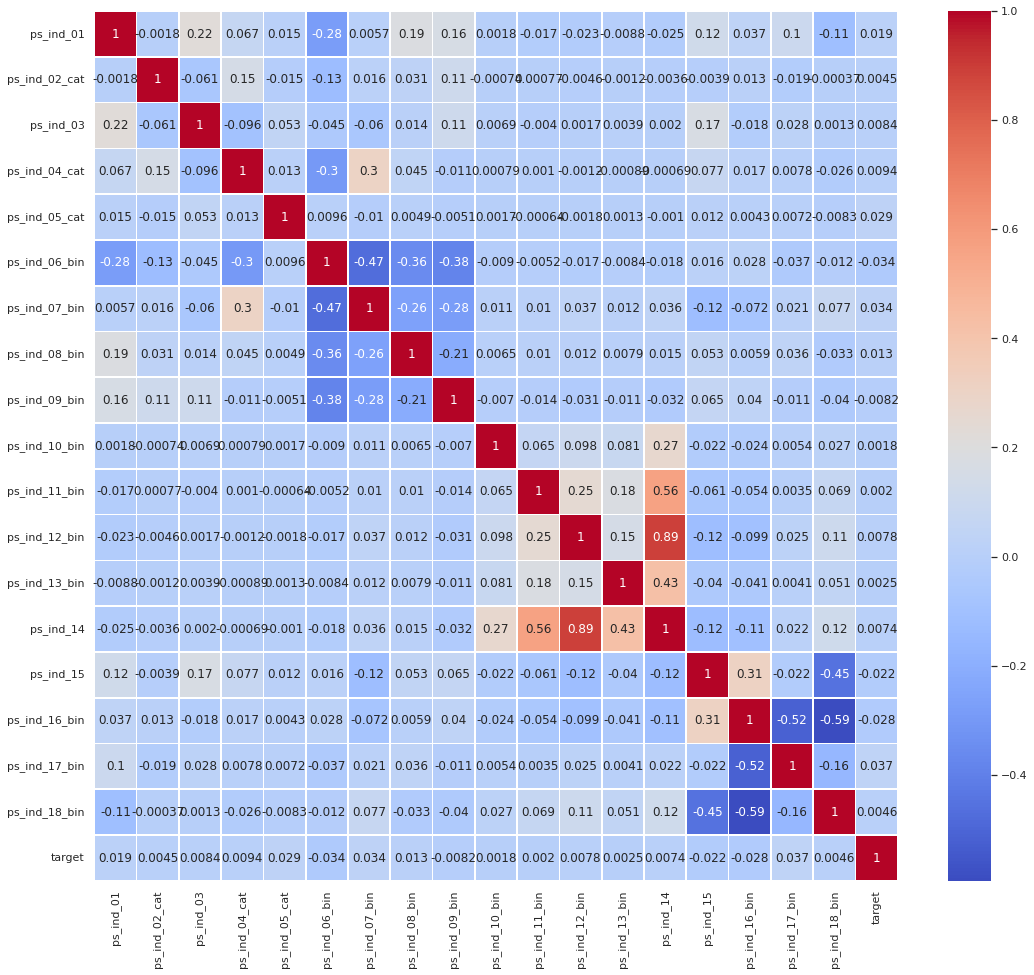

In [20]:
## Checking the correlation with ps_ind and target columns in dataset
ps_ind =[i for i in df.columns if i.startswith('ps_ind')]
ps_ind.append('target')
plt.rcParams["figure.figsize"] = (18,16)
sns.heatmap(df[ps_ind].corr(),annot=True, linewidths= .7,cmap="coolwarm")

Observations:
1. ps_ind_14 column is highly correlated with ps_ind_12_bin column but not correlated with target column
2. ps_ind_01,ps_ind_04_cat to ps_ind_08_cat,ps_ind_15_bin,ps_ind_16_bin,ps_ind_17_bin columns have better correlation with target columm

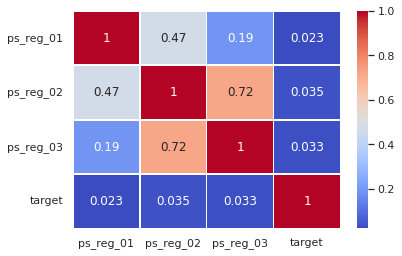

In [21]:
## Checking the correlation with ps_reg and target columns in dataset
ps_reg =[i for i in df.columns if i.startswith('ps_reg')]
ps_reg.append('target')
plt.rcParams["figure.figsize"] = (6,4)
sns.heatmap(df[ps_reg].corr(),annot=True, linewidths= .7,cmap="coolwarm")

ps_reg columns have better correlation with target column

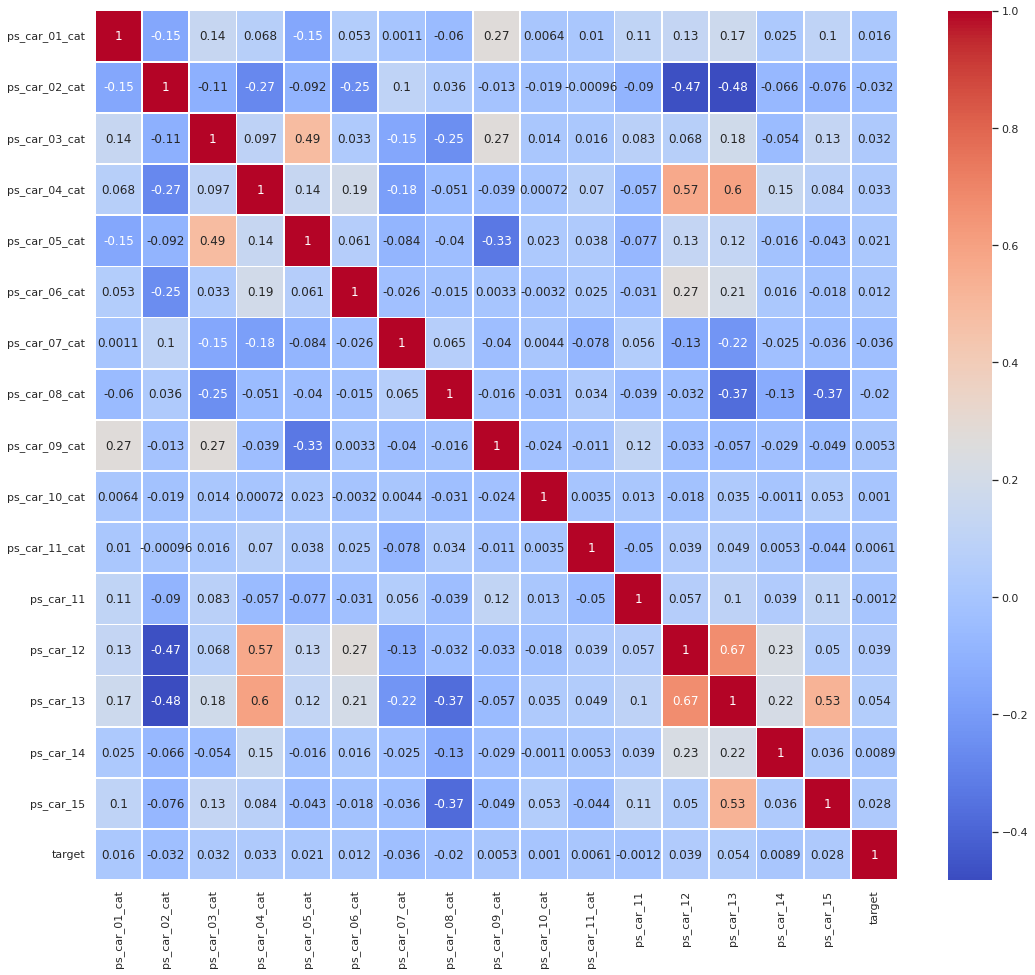

In [22]:
## Checking the correlation with ps_car and target columns in dataset
ps_car =[i for i in df.columns if i.startswith('ps_car')]
ps_car.append('target')
plt.rcParams["figure.figsize"] = (18,16)
sns.heatmap(df[ps_car].corr(),annot=True, linewidths= .7,cmap="coolwarm")

ps_car_01_cat to ps_car_05_cat,ps_car_07_cat,ps_car_08_cat,ps_car_12,ps_car_13,ps_car_15 columns have better correlation with target column

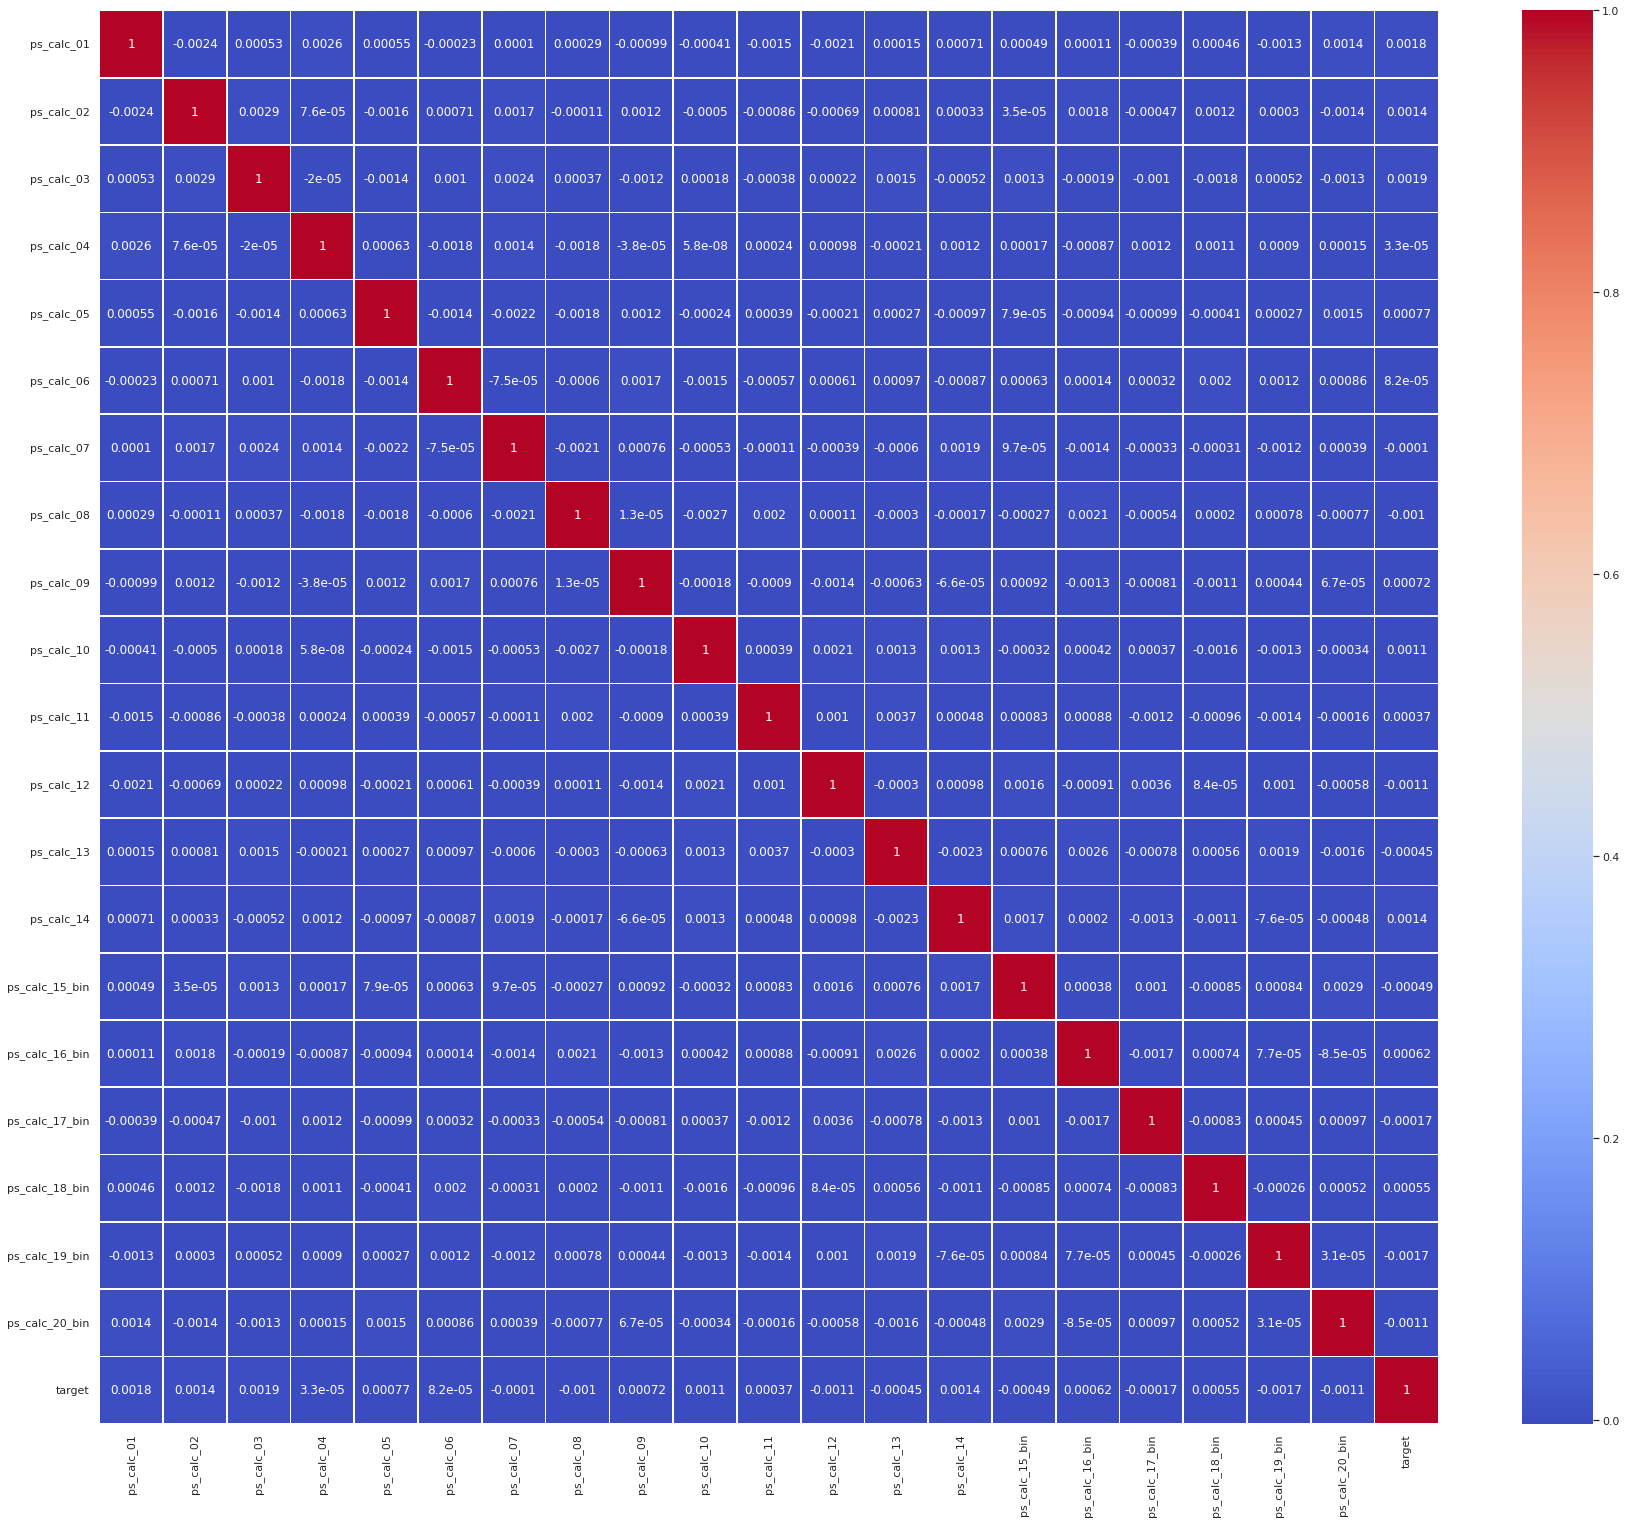

In [23]:
## Checking the correlation with ps_calc and target columns in dataset
ps_calc =[i for i in df if i.startswith('ps_calc')]
ps_calc.append('target')
plt.rcParams["figure.figsize"] = (30,26)
sns.heatmap(df[ps_calc].corr(),annot=True, linewidths= .7,cmap="coolwarm")

No columns are highly correlated with target. ps_calc columns are least correlated columns with Target. These columns can be dropped.

In [24]:
#Dropping unwanted columns, id and ps_calc columns from dataset
df = df[df.columns[1:39]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   target         595212 non-null  int64  
 1   ps_ind_01      595212 non-null  int64  
 2   ps_ind_02_cat  595212 non-null  int64  
 3   ps_ind_03      595212 non-null  int64  
 4   ps_ind_04_cat  595212 non-null  int64  
 5   ps_ind_05_cat  595212 non-null  int64  
 6   ps_ind_06_bin  595212 non-null  int64  
 7   ps_ind_07_bin  595212 non-null  int64  
 8   ps_ind_08_bin  595212 non-null  int64  
 9   ps_ind_09_bin  595212 non-null  int64  
 10  ps_ind_10_bin  595212 non-null  int64  
 11  ps_ind_11_bin  595212 non-null  int64  
 12  ps_ind_12_bin  595212 non-null  int64  
 13  ps_ind_13_bin  595212 non-null  int64  
 14  ps_ind_14      595212 non-null  int64  
 15  ps_ind_15      595212 non-null  int64  
 16  ps_ind_16_bin  595212 non-null  int64  
 17  ps_ind_17_bin  595212 non-nul

In [25]:
df.ps_car_15.value_counts()

3.605551    109765
3.464102     77200
3.316625     68737
3.162278     63323
3.741657     57757
2.828427     48680
3.000000     48537
2.645751     30388
2.449490     20445
2.236068     19397
0.000000     14186
2.000000     12830
1.732051     10744
1.000000      6708
1.414214      6515
Name: ps_car_15, dtype: int64

As no features information were provided, checked for value counts in float columns for finalizing Categorical and Numerical columns
1. ps_car_12, ps_car_13, ps_car_14 and ps_reg_03 have been already considered as numerical column as they have more distinct values.
2. ps_reg_01 - values are between 0.0 to 0.9. Values are with the increment of +0.1, so this can be considered categorical.
3. ps_reg_02 - values are between 0.0 to 1.7. Values are with the increment of +0.1, so this can be considered categorical. 
4. ps_car_15 - values ranging between 0.00 to 3.60. Values range dont follow specific order. So, this can be considered as numerical column eventhough it has only 15 distinct values.


In [26]:
# Adding ps_car_15 to the numerical list as that column is considered as numerical
numerical.append('ps_car_15')

In [27]:
# Creating a list of categorical variables without ps_calc, target and numerical columns
categorical = list(df.columns[1:])
for i in numerical:
  categorical.remove(i)

In [28]:
print('Numerical columns \n',numerical)
print('Categorical columns \n',categorical)

Numerical columns 
 ['ps_car_13', 'ps_reg_03', 'ps_car_14', 'ps_car_12', 'ps_car_15']
Categorical columns 
 ['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11']


In [29]:
# Handling Categorical variables
# Encoding the categorical variables using One Hot encoding technique to eliminate -1 value from the dataset
df = pd.get_dummies(df,columns=categorical,drop_first=True)

In [30]:
df

,target,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_ind_01_1,ps_ind_01_2,ps_ind_01_3,ps_ind_01_4,ps_ind_01_5,ps_ind_01_6,ps_ind_01_7,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_03_1,ps_ind_03_2,ps_ind_03_3,ps_ind_03_4,ps_ind_03_5,ps_ind_03_6,ps_ind_03_7,ps_ind_03_8,ps_ind_03_9,ps_ind_03_10,ps_ind_03_11,ps_ind_04_cat_0,...,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,ps_car_11_0,ps_car_11_1,ps_car_11_2,ps_car_11_3
0,0,0.718070,0.400000,0.883679,0.370810,3.605551,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0.766078,0.316228,0.618817,0.388716,2.449490,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0.818935,0.316228,0.641586,0.347275,3.316625,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0.580948,0.374166,0.542949,0.294958,2.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0.840759,0.316070,0.565832,0.365103,2.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,0.692820,0.374166,0.684631,0.385487,2.645751,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
595208,0,1.382027,0.387298,0.972145,0.928395,3.605551,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
595209,0,0.659071,0.397492,0.596373,0.398748,1.732051,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
595210,0,0.698212,0.374166,0.764434,0.384968,3.162278,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [31]:
# Independent and dependent variable creation
X = df.drop(['target'],axis="columns")
y = df['target']

In [32]:
X.shape

(595212, 252)

In [33]:
## creating training and testing data using stratified splitting as this is classification problem
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42,test_size=0.2,stratify=y)

In [34]:
X_train

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_ind_01_1,ps_ind_01_2,ps_ind_01_3,ps_ind_01_4,ps_ind_01_5,ps_ind_01_6,ps_ind_01_7,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_03_1,ps_ind_03_2,ps_ind_03_3,ps_ind_03_4,ps_ind_03_5,ps_ind_03_6,ps_ind_03_7,ps_ind_03_8,ps_ind_03_9,ps_ind_03_10,ps_ind_03_11,ps_ind_04_cat_0,ps_ind_04_cat_1,...,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,ps_car_11_0,ps_car_11_1,ps_car_11_2,ps_car_11_3
520363,0.704894,0.400000,0.596079,0.410244,1.732051,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
271468,0.818935,0.316070,0.729403,0.928395,3.162278,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
575806,1.404902,0.400000,0.737331,0.397492,2.828427,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
145105,0.818935,0.424264,0.980323,0.325576,3.162278,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31107,1.148913,0.374166,0.674491,0.397492,2.449490,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72635,0.818935,0.547723,1.382229,0.532917,3.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
129319,0.555090,0.374166,0.777193,0.371618,3.464102,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
90875,0.813557,0.374166,0.661859,0.392683,2.828427,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
417177,0.983298,0.374166,0.740533,0.416653,3.162278,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
X_train.shape,X_test.shape

((476169, 252), (119043, 252))

In [36]:
y_train.value_counts(),y_test.value_counts()

(0    458814
 1     17355
 Name: target, dtype: int64, 0    114704
 1      4339
 Name: target, dtype: int64)

In [45]:
print('Majority class (0) : {:.2f}% '.format(100-(Counter(y)[1]/Counter(y)[0])*100))
print('Minority class (1) : {:.2f}%'.format((Counter(y)[1]/Counter(y)[0])*100))

Majority class (0) : 96.22% 
Minority class (1) : 3.78%


Dataset is highly imbalanced with 0 as majority class with 96.22% and 1 as minority class with 3.78% 

In [46]:
# Oversampling the training data
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(sampling_strategy='minority')
#X_train,y_train = sm.fit_resample(X_train,y_train)

In [47]:
# Scaling the continuos variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[X_train.columns[0:5]] = scaler.fit_transform(X_train[X_train.columns[0:5]])
X_test[X_test.columns[0:5]] = scaler.transform(X_test[X_test.columns[0:5]])

Data Preprocessing and Feature Engineering - Observations and Actions taken:
1. Checked for total number of duplicates without considering id column as that column is useless. There were no Duplicate rows in the provided dataset.
2. Checked for missing values in the provided dataset, there was no missing values.
3. As the name of the features were not revealed, created a dataframe to find the numerical and categorical columns based on Distinct counts. 
4. Checked the outliers of the numerical columns using seaborn boxplot and distplot and found that there were many negative values in the provided dataset.
5. Checked the total number of negative values present in the numerical columns and replaced the negative values of numerical columns with mean of positive values(ie. values > 0) present in numerical columns.
6. Checked for outliers using IQR method for updated numerical features and found that there was 23% outliers present in the dataset, so didnt remove outliers.
7. Checked the correlation with the columns present in the dataset excluding id column as that column was useless. 
8. Found that ps_calc columns are least correlated columns with Target. So decided to remove these columns from the dataset. ID column and ps_calc columns were removed from the dataset.
9. As no features information were provided, checked for value counts in float columns for finalizing Categorical and Numerical columns and found that ps_car_15 columns values ranging between 0.00 to 3.60. Values range dont follow specific order. So, this was considered as numerical column eventhough it has only 15 distinct values.
10. Encoded the categorical variables using One Hot encoding technique(Pandas getdummies method) to eliminate -1 value from the dataset.
11. Created Independent(X) and Dependent(y) variables.
12. Created training(X_train,y_train) and testing(X_test and y_test) data using stratified splitting as this is classification problem.
13. Scaled the independent numerical features data using standard scalar.

### Model Creation

#### Considered ROC_AUC score as the performance metric for this problem as the provided dataset is highly imbalanced.

In [48]:
# Defining a function to predict Xtest and check the model performance metrics
def performance_metrics(model):
    print("Train score : " , model.score(X_train, y_train))
    print("Test score : " , model.score(X_test, y_test))
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print("ROC_AUC score : " ,roc_auc_score(y_test, y_pred_proba))#Computes Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

In [49]:
# Defining a function to plot ROC Curve with Area under the curve
def auc_roc_curve(model):
    plt.rcParams['figure.figsize'] = 10, 6
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba)
    plt.plot([0,1],[0,1],color='red', linestyle='--')
    plt.plot(false_positive_rate, true_positive_rate,label="ROC Curve with Area Under the curve ="+str(round(roc_auc_score(y_test, y_pred_proba),4)))
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [50]:
# Using Stratified KFold cross validation technique as this is a classification problem
skfold=StratifiedKFold(n_splits=3)

##### Logistic Regression

In [ ]:
# Creating model and hyperparameter tuning using Gridsearch cv
model = LogisticRegression(random_state=42,class_weight='balanced',solver='sag')
#setting parameters
max_iter = [50, 100, 200, 400, 500, 600]
C = [0.0001,0.001,0.01,1,10,100,1000]
parameter = {
    'max_iter' :max_iter,
    'C' : C
}
logistic = GridSearchCV(estimator=model,param_grid=parameter,cv=skfold, scoring = 'roc_auc',n_jobs=-1)
logistic.fit(X_train,y_train)
print('Best score of ROC_AUC : ',logistic.best_score_)
print('Best parameters : \n',logistic.best_params_)

Best score of ROC_AUC :  0.6339508877457941
Best parameters : 
 {'C': 0.01, 'max_iter': 50}


In [ ]:
# Logistic Regression CV results
pd.DataFrame(logistic.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,15.894971,0.486238,0.114653,0.002475,0.0001,50,"{'C': 0.0001, 'max_iter': 50}",0.630255,0.625428,0.629295,0.628326,0.002086,37
1,15.767830,0.600806,0.112344,0.003919,0.0001,100,"{'C': 0.0001, 'max_iter': 100}",0.630255,0.625428,0.629295,0.628326,0.002086,37
2,16.533583,1.053984,0.111941,0.001666,0.0001,200,"{'C': 0.0001, 'max_iter': 200}",0.630255,0.625428,0.629295,0.628326,0.002086,37
3,15.659802,0.499036,0.113969,0.005433,0.0001,400,"{'C': 0.0001, 'max_iter': 400}",0.630255,0.625428,0.629295,0.628326,0.002086,37
4,15.594759,0.511521,0.113412,0.007324,0.0001,500,"{'C': 0.0001, 'max_iter': 500}",0.630255,0.625428,0.629295,0.628326,0.002086,37
5,15.630539,0.475162,0.110631,0.001144,0.0001,600,"{'C': 0.0001, 'max_iter': 600}",0.630255,0.625428,0.629295,0.628326,0.002086,37
6,19.351492,1.272365,0.110671,0.000930,0.001,50,"{'C': 0.001, 'max_iter': 50}",0.635149,0.631469,0.634576,0.633732,0.001617,7
7,18.653775,1.229496,0.114260,0.006396,0.001,100,"{'C': 0.001, 'max_iter': 100}",0.635149,0.631469,0.634576,0.633732,0.001617,7
8,18.635456,1.297320,0.110713,0.003599,0.001,200,"{'C': 0.001, 'max_iter': 200}",0.635149,0.631469,0.634576,0.633732,0.001617,7
9,19.878670,2.571380,0.288629,0.249322,0.001,400,"{'C': 0.001, 'max_iter': 400}",0.635149,0.631469,0.634576,0.633732,0.001617,7


In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
logistic = LogisticRegression(random_state=42,class_weight='balanced',solver='sag',C = 0.01, max_iter = 50)
logistic.fit(X_train,y_train)
performance_metrics(logistic)

Train score :  0.6246878734230914
Test score :  0.6230185731206371
ROC_AUC score :  0.6391206223364914


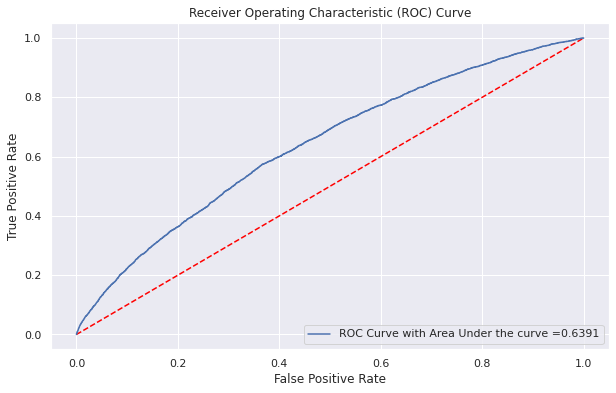

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(logistic)

Logistic Regression model performing better with ROC AUC score 0.6391

##### Decision Tree

In [ ]:
# Creating model and hyperparameter tuning using Gridsearch cv
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
#setting parameters
max_depth = [int(x) for x in np.linspace(1,20,num=5)]
min_samples_split = [int(x) for x in np.linspace(8,60,5)]
min_samples_leaf = [int(x) for x in np.linspace(1,20,num=5)]
parameter = {
    'max_depth' :max_depth,
    'min_samples_split' :min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
decisiontree = GridSearchCV(estimator=model,param_grid=parameter,cv=skfold, scoring = 'roc_auc',n_jobs=-1)
decisiontree.fit(X_train,y_train)
print('Best score of ROC_AUC : ',decisiontree.best_score_)
print('Best parameters : \n',decisiontree.best_params_)

Best score of ROC_AUC :  0.6007454381491095
Best parameters : 
 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [ ]:
# Decision tree CV results
pd.DataFrame(decisiontree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.124469,0.151725,0.126710,0.003804,1,1,8,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.551308,0.556726,0.556356,0.554797,0.002471,60
1,2.069632,0.131134,0.178850,0.037993,1,1,21,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.551308,0.556726,0.556356,0.554797,0.002471,60
2,5.203024,0.823068,0.299278,0.086755,1,1,34,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.551308,0.556726,0.556356,0.554797,0.002471,60
3,3.848416,0.565066,0.166593,0.007123,1,1,47,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.551308,0.556726,0.556356,0.554797,0.002471,60
4,3.260565,0.249404,0.186429,0.030079,1,1,60,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.551308,0.556726,0.556356,0.554797,0.002471,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,17.457591,0.279535,0.188550,0.005789,20,20,8,"{'max_depth': 20, 'min_samples_leaf': 20, 'min...",0.539777,0.524312,0.541317,0.535135,0.007679,105
121,17.476054,0.431756,0.197469,0.009484,20,20,21,"{'max_depth': 20, 'min_samples_leaf': 20, 'min...",0.539777,0.524312,0.541317,0.535135,0.007679,105
122,17.331255,0.177516,0.194360,0.012933,20,20,34,"{'max_depth': 20, 'min_samples_leaf': 20, 'min...",0.539777,0.524312,0.541317,0.535135,0.007679,105
123,17.612926,0.582636,0.202928,0.004937,20,20,47,"{'max_depth': 20, 'min_samples_leaf': 20, 'min...",0.540631,0.524896,0.541788,0.535772,0.007705,104


In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
decision_tree = DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth= 5, min_samples_leaf= 1, min_samples_split= 8)
decision_tree.fit(X_train,y_train)
performance_metrics(decision_tree)

Train score :  0.5673195861133337
Test score :  0.5676940265282293
ROC_AUC score :  0.6059440215003452


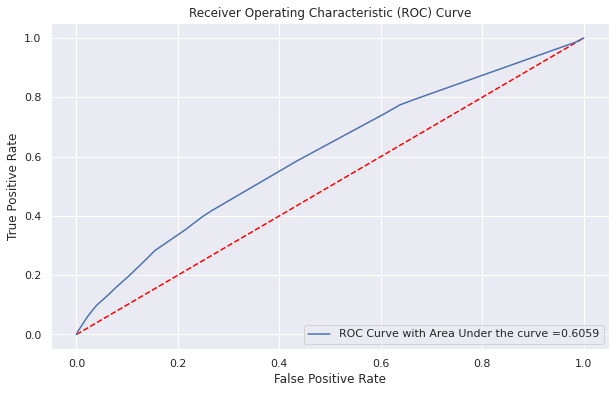

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(decision_tree)

Decision tree model not performing well when compared to Logistic regression model

##### Random Forest Classifier (Bagging Ensemble technique)

In [ ]:
# Creating model and hyperparameter tuning using Randomizedsearch cv
model = RandomForestClassifier(random_state=42,class_weight='balanced')
#setting parameters
n_estimators = [50, 100, 200, 400, 500, 600, 800, 1000]
max_depth = [int(x) for x in np.linspace(1,20,num=10)]
min_samples_split = [int(x) for x in np.linspace(8,60,10)]
min_samples_leaf = [int(x) for x in np.linspace(1,20,num=10)]
parameter = {
    'n_estimators': n_estimators,
    'max_depth' :max_depth,
    'min_samples_split' :min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
randomforest = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv=skfold, scoring = 'roc_auc',n_jobs=-1,random_state=42)
randomforest.fit(X_train,y_train)
print('Best score of ROC_AUC : ',randomforest.best_score_)
print('Best parameters : \n',randomforest.best_params_)

Best score of ROC_AUC :  0.6273526047479244
Best parameters : 
 {'n_estimators': 800, 'min_samples_split': 25, 'min_samples_leaf': 15, 'max_depth': 13}


In [ ]:
# Random Forest CV results
pd.DataFrame(randomforest.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1196.222738,12.498227,58.229512,1.815586,800,54,1,20,"{'n_estimators': 800, 'min_samples_split': 54,...",0.619770,0.617770,0.619222,0.618921,0.000844,10
1,584.601903,20.205579,29.323879,0.669373,400,8,11,20,"{'n_estimators': 400, 'min_samples_split': 8, ...",0.620952,0.618480,0.619812,0.619748,0.001010,8
2,142.597885,1.274743,8.308548,0.080734,500,48,1,3,"{'n_estimators': 500, 'min_samples_split': 48,...",0.620256,0.618563,0.619100,0.619306,0.000706,9
3,876.845484,11.274573,42.388092,1.553009,800,25,15,13,"{'n_estimators': 800, 'min_samples_split': 25,...",0.628615,0.626127,0.627316,0.627353,0.001016,1
4,222.629584,2.085052,10.593849,0.158415,200,25,11,13,"{'n_estimators': 200, 'min_samples_split': 25,...",0.626288,0.624185,0.625793,0.625422,0.000898,5
5,1079.178171,26.556473,51.760570,1.823347,1000,54,9,13,"{'n_estimators': 1000, 'min_samples_split': 54...",0.628561,0.625714,0.627780,0.627351,0.001201,2
6,374.055872,11.256401,18.932989,0.946790,500,13,15,9,"{'n_estimators': 500, 'min_samples_split': 13,...",0.628516,0.625235,0.627017,0.626923,0.001341,3
7,284.338884,3.464133,14.160555,0.148106,500,42,17,7,"{'n_estimators': 500, 'min_samples_split': 42,...",0.626515,0.624300,0.625543,0.625452,0.000906,4
8,917.007464,76.166509,42.508444,7.705413,800,42,3,15,"{'n_estimators': 800, 'min_samples_split': 42,...",0.625294,0.622178,0.624683,0.624052,0.001348,6
9,125.491513,2.639763,6.189096,0.212506,100,25,17,15,"{'n_estimators': 100, 'min_samples_split': 25,...",0.625659,0.621044,0.622868,0.623190,0.001898,7


In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
random_forest = RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators = 800, min_samples_split = 25, min_samples_leaf = 15, max_depth = 13)
random_forest.fit(X_train,y_train)
performance_metrics(random_forest)

Train score :  0.7385655093044696
Test score :  0.7270650101223928
ROC_AUC score :  0.6323789916804933


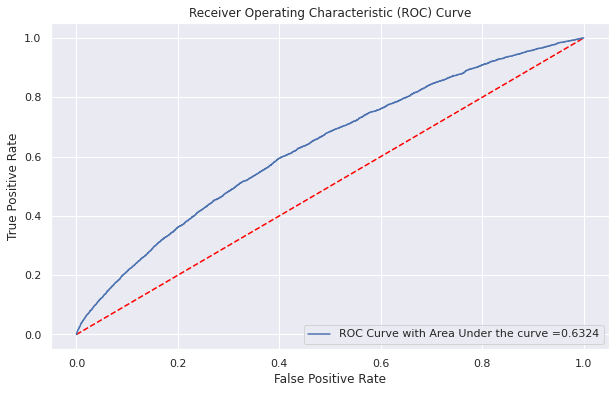

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(random_forest)

Random Forest classifier not performing well when compared to Logistic regression model

##### Bagging Classifier (Bagging Ensemble technique)

In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
bagging_classifier = BaggingClassifier(base_estimator=LogisticRegression(random_state=42,class_weight='balanced',solver='sag',C = 0.1,max_iter = 50),n_estimators=200,max_features=1.0, n_jobs=-1, random_state=42)
bagging_classifier.fit(X_train,y_train)
performance_metrics(bagging_classifier)

Train score :  0.6162286919140053
Test score :  0.6143830380618768
ROC_AUC score :  0.6374551593920343


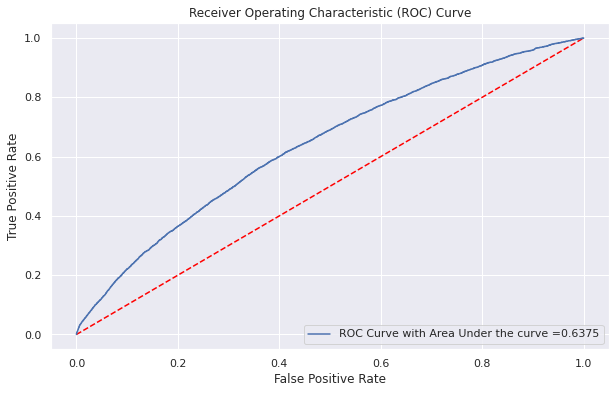

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(bagging_classifier)

Decision tree model not performing better than Logistic regression model

##### AdaBoost Classifier (Boosting Ensemble technique)

In [ ]:
# Creating model and hyperparameter tuning using Randomized search cv
model = AdaBoostClassifier(random_state=42)
#setting parameters
n_estimators = [50, 100, 200, 400, 500, 600, 800, 1000]
learning_rate = [0.01 , 0.012, 0.014, 0.016, 0.019,0.1]    
parameter = {
    'n_estimators': n_estimators,
    'learning_rate' : learning_rate
}
adaboost = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv=skfold, scoring = 'roc_auc',n_jobs=-1,random_state=42)
adaboost.fit(X_train,y_train)
print('Best score of ROC_AUC : ',adaboost.best_score_)
print('Best parameters : \n',adaboost.best_params_)

Best score of ROC_AUC :  0.6296480591222119
Best parameters : 
 {'n_estimators': 400, 'learning_rate': 0.1}


In [ ]:
# Adaboost CV results
pd.DataFrame(adaboost.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,819.632693,4.906930,65.359580,1.487538,400,0.016,"{'n_estimators': 400, 'learning_rate': 0.016}",0.620208,0.616138,0.618833,0.618393,0.001691,3
1,100.590144,1.760366,7.730187,0.070285,50,0.1,"{'n_estimators': 50, 'learning_rate': 0.1}",0.618738,0.614751,0.616973,0.616821,0.001631,6
2,407.554684,3.076278,33.846162,0.190878,200,0.016,"{'n_estimators': 200, 'learning_rate': 0.016}",0.614523,0.610305,0.612529,0.612452,0.001723,8
3,806.706866,1.269771,65.374266,3.801890,400,0.1,"{'n_estimators': 400, 'learning_rate': 0.1}",0.632478,0.626956,0.629511,0.629648,0.002257,1
4,104.140161,1.363694,8.603653,0.028705,50,0.016,"{'n_estimators': 50, 'learning_rate': 0.016}",0.595522,0.599818,0.603361,0.599567,0.003205,10
5,1232.348865,11.397967,94.637812,4.391754,600,0.019,"{'n_estimators': 600, 'learning_rate': 0.019}",0.624862,0.620138,0.622561,0.622520,0.001929,2
6,1045.360160,5.850241,79.300975,3.329605,500,0.012,"{'n_estimators': 500, 'learning_rate': 0.012}",0.619873,0.615593,0.618392,0.617953,0.001775,4
7,832.252463,8.572431,60.969093,0.092675,400,0.014,"{'n_estimators': 400, 'learning_rate': 0.014}",0.619444,0.615019,0.617899,0.617454,0.001834,5
8,1031.673458,10.495818,76.665374,0.784162,500,0.01,"{'n_estimators': 500, 'learning_rate': 0.01}",0.618548,0.614277,0.616949,0.616591,0.001762,7
9,179.786686,38.069338,13.683692,2.363132,100,0.016,"{'n_estimators': 100, 'learning_rate': 0.016}",0.606650,0.604604,0.609155,0.606803,0.001861,9


In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
adaboost = AdaBoostClassifier(random_state=42, n_estimators= 400,learning_rate = 0.1)
adaboost.fit(X_train,y_train)
performance_metrics(adaboost)

Train score :  0.9635528562338161
Test score :  0.9635509857782482
ROC_AUC score :  0.6352293304994157


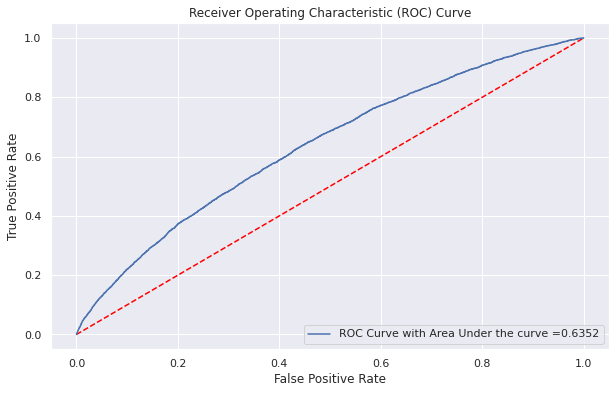

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(adaboost)

Adaboost model doesn't work good with the imbalanced data. Model is biased with the majority class.

Gradient boosting classifiers are the AdaBoosting method combined with weighted minimization, after which the classifiers and weighted inputs are recalculated.

##### Gradient Boosting Classifier (Boosting Ensemble technique)

In [ ]:
# Creating model and hyperparameter tuning using Randomized search cv
model = GradientBoostingClassifier(random_state=42)
#setting parameters
n_estimators = [50, 100, 200, 400, 500, 600, 800, 1000]
learning_rate = [0.01 , 0.012, 0.014, 0.016,0.019,0.1] 
parameter = {
    'n_estimators': n_estimators,
    'learning_rate' : learning_rate
}
gradient = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv=skfold, scoring = 'roc_auc',n_jobs=-1,random_state=42)
gradient.fit(X_train,y_train)
print('Best score of ROC_AUC : ',gradient.best_score_)
print('Best parameters : \n',gradient.best_params_)

Best score of ROC_AUC :  0.633016729024842
Best parameters : 
 {'n_estimators': 400, 'learning_rate': 0.1}


In [ ]:
# Grandient boost classifier CV results
pd.DataFrame(gradient.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2230.452533,3.085681,9.610674,0.523016,400,0.016,"{'n_estimators': 400, 'learning_rate': 0.016}",0.631456,0.626084,0.630613,0.629385,0.002359,3
1,287.211228,2.739879,2.113300,0.310907,50,0.1,"{'n_estimators': 50, 'learning_rate': 0.1}",0.629526,0.624932,0.629091,0.627850,0.002071,6
2,1102.823053,4.478139,5.387635,0.051153,200,0.016,"{'n_estimators': 200, 'learning_rate': 0.016}",0.625741,0.621113,0.625428,0.624094,0.002112,8
3,2183.599267,8.113094,8.885208,0.087345,400,0.1,"{'n_estimators': 400, 'learning_rate': 0.1}",0.633804,0.630314,0.634932,0.633017,0.001966,1
4,271.857708,0.608065,1.905739,0.037353,50,0.016,"{'n_estimators': 50, 'learning_rate': 0.016}",0.613205,0.608066,0.614478,0.611916,0.002772,10
5,3309.534318,11.273779,14.733923,0.515755,600,0.019,"{'n_estimators': 600, 'learning_rate': 0.019}",0.633356,0.628502,0.633438,0.631765,0.002308,2
6,2723.351857,4.834211,12.345148,0.224040,500,0.012,"{'n_estimators': 500, 'learning_rate': 0.012}",0.631034,0.625675,0.630137,0.628949,0.002343,4
7,2216.614268,14.692467,10.441512,0.167833,400,0.014,"{'n_estimators': 400, 'learning_rate': 0.014}",0.630436,0.625186,0.629756,0.628459,0.002331,5
8,2752.087638,16.804404,13.094106,0.366130,500,0.01,"{'n_estimators': 500, 'learning_rate': 0.01}",0.629730,0.624422,0.628874,0.627675,0.002327,7
9,467.152018,116.377165,2.763155,0.644027,100,0.016,"{'n_estimators': 100, 'learning_rate': 0.016}",0.619676,0.614961,0.618732,0.617789,0.002037,9


In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
gradientboost = GradientBoostingClassifier(random_state=42, n_estimators = 400, learning_rate = 0.1)
gradientboost.fit(X_train,y_train)
performance_metrics(gradientboost)

Train score :  0.9636767618219582
Test score :  0.963508984148585
ROC_AUC score :  0.6396196703023834


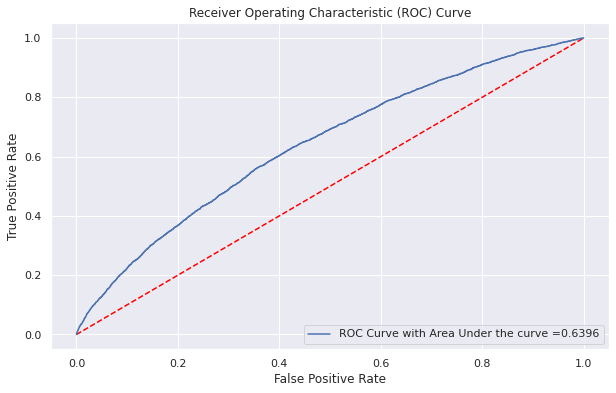

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(gradientboost)

Gradient Boosting model not performing better than Logistic regression model and this model is also biased with the majority class.

In [51]:
#Estimate scale_pos_weight value to be used in XG Boosting classifier, Catboost classifier, LGBM classifier and Stacking classifier
estimate = Counter(y)[0]/Counter(y)[1]
estimate

26.43671061122891

##### XG Boosting Classifier (Boosting Ensemble technique)

In [ ]:
# Creating model and hyperparameter tuning using for loop

# Parameter
n_estimators = [500,1000,1250,1500,1750]

#Creating list for storing performance metrics
n__estimators = []
train_score = []
test_score = []
precision = []
recall = []
roc_auc = []

for i in n_estimators:
  n__estimators.append(i)
  model = XGBClassifier(random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators=i,n_jobs=-1)
  model.fit(X_train,y_train)
  y_predicted = model.predict(X_test)
  train_score.append(model.score(X_train, y_train))
  test_score.append(model.score(X_test, y_test))
  precision.append(precision_score(y_test, y_predicted))
  recall.append(recall_score(y_test, y_predicted))
  roc_auc.append(roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]))
  print("Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = {} completed".format(i))

Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 500 completed
Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 1000 completed
Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 1250 completed
Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 1500 completed
Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 1750 completed


In [ ]:
del roc_auc_score

In [ ]:
xg = list(zip(n__estimators,train_score,test_score,precision,recall,roc_auc))
xg_df = pd.DataFrame(xg,columns=['n_estimators','train_score','test_score','precision_score','recall score','roc_auc_score'])
xg_df

,n_estimators,train_score,test_score,precision_score,recall score,roc_auc_score
0,500,0.643933,0.639861,0.055631,0.555888,0.635703
1,1000,0.662389,0.655141,0.055521,0.528463,0.631027
2,1250,0.669762,0.661358,0.055547,0.518092,0.629259
3,1500,0.676176,0.666087,0.055261,0.507029,0.627139
4,1750,0.682300,0.670884,0.055272,0.498963,0.625843


In [ ]:
# Parameter
n_estimators = [50,100,200,300,400]

#Creating list for storing performance metrics
n__estimators = []
train_score = []
test_score = []
precision = []
recall = []
roc_auc = []

for i in n_estimators:
  n__estimators.append(i)
  model = XGBClassifier(random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators=i,n_jobs=-1)
  model.fit(X_train,y_train)
  y_predicted = model.predict(X_test)
  train_score.append(model.score(X_train, y_train))
  test_score.append(model.score(X_test, y_test))
  precision.append(precision_score(y_test, y_predicted))
  recall.append(recall_score(y_test, y_predicted))
  roc_auc.append(roc_auc_score(y_test,model.predict_proba(X_test)[:, 1]))
  print("Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = {} completed".format(i))
xg = list(zip(n__estimators,train_score,test_score,precision,recall,roc_auc))
xg_df = pd.DataFrame(xg,columns=['n_estimators','train_score','test_score','precision_score','recall score','roc_auc_score'])
xg_df

Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 50 completed
Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 100 completed
Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 200 completed
Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 300 completed
Running with parameter random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators = 400 completed


,n_estimators,train_score,test_score,precision_score,recall score,roc_auc_score
0,50,0.622993,0.623371,0.053596,0.560267,0.633097
1,100,0.626977,0.626051,0.054490,0.566260,0.636808
2,200,0.632129,0.630873,0.054812,0.561881,0.637101
3,300,0.636503,0.634250,0.055232,0.560959,0.637068
4,400,0.640857,0.637207,0.055229,0.555888,0.635991


In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
xgb = XGBClassifier(random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators=200,n_jobs=-1)
xgb.fit(X_train,y_train)
performance_metrics(xgb)

Train score :  0.6321285089957557
Test score :  0.6308728778676612
ROC_AUC score :  0.6371013754500656


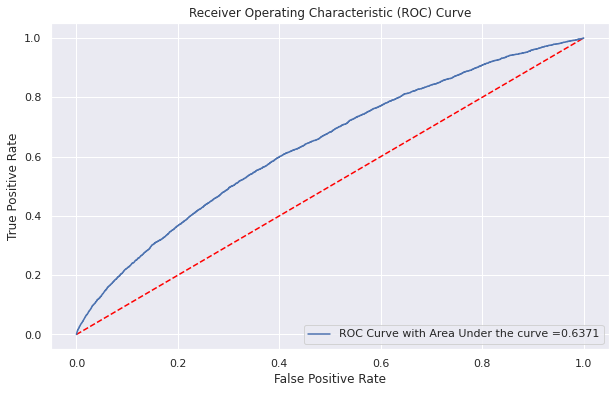

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(xgb)

In [ ]:
# Using Stratified KFold cross validation technique
scores=cross_val_score(xgb,X_train,y_train,cv=skfold,scoring='roc_auc')
print(np.mean(scores))

0.6315849225769983


In [ ]:
scores

array([0.63231821, 0.63051827, 0.63191829])

XG Boosting classifier model was performing better but not better than Logistic regression model

##### CatBoost Classifier

In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
catboost = CatBoostClassifier(random_state=42,scale_pos_weight=estimate,learning_rate=0.1,verbose=False, n_estimators=170,depth = 5)
catboost.fit(X_train,y_train)
performance_metrics(catboost)

Train score :  0.6311540650483337
Test score :  0.6288736002956915
ROC_AUC score :  0.6375622408261402


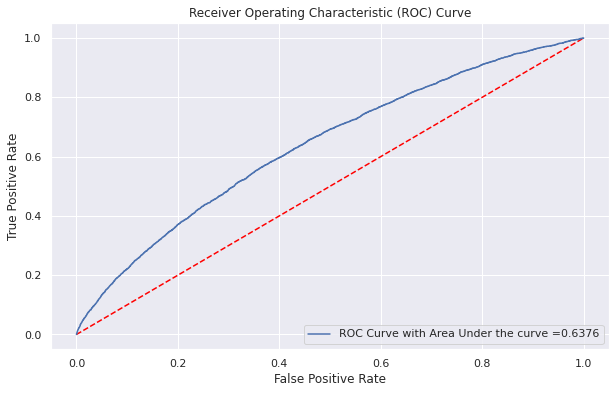

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(catboost)

In [ ]:
# Using Stratified KFold cross validation technique
scores=cross_val_score(catboost,X_train,y_train,cv=skfold,scoring='roc_auc')
print(np.mean(scores))

0.6312215515679694


In [ ]:
scores

array([0.63160064, 0.63028681, 0.63177721])

CatBoost classifier model performing better but not better than Logistic regression model

##### LGBM Classifier

In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability
lgbm = LGBMClassifier(random_state=42,scale_pos_weight=estimate,learning_rate=0.1,verbose=None, n_estimators=500, max_depth = 2)
lgbm.fit(X_train,y_train)
performance_metrics(lgbm)

Train score :  0.627514600908501
Test score :  0.6260762917601203
ROC_AUC score :  0.6373540705158324


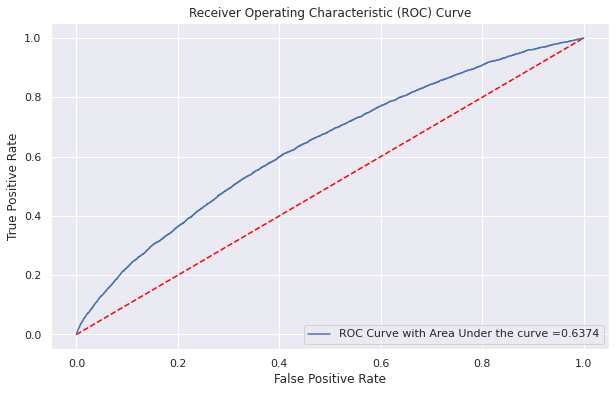

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(lgbm)

In [ ]:
# Using Stratified KFold cross validation technique
scores=cross_val_score(lgbm,X_train,y_train,cv=skfold,scoring='roc_auc')
print(np.mean(scores))

0.6311983818382533


In [ ]:
scores

array([0.63161433, 0.63009964, 0.63188117])

LGBM classifier model was performing better but not better than Logistic regression model

##### Stacking Classifier (Stacking Ensemble technique)

In [ ]:
# Creating model with best hyperparameters and checking performance metrics for predicting probability

# Using best parameters with respect to each models used
logistic = LogisticRegression(random_state=42,class_weight='balanced',solver='sag',C = 0.01, max_iter = 50)
xgb = XGBClassifier(random_state=42,scale_pos_weight=estimate,learning_rate=0.1,n_estimators=200,n_jobs=-1)
catboost = CatBoostClassifier(random_state=42,scale_pos_weight=estimate,learning_rate=0.1,verbose=False, n_estimators=170,depth = 5)
lgbm = LGBMClassifier(random_state=42,scale_pos_weight=estimate,learning_rate=0.1,verbose=None, n_estimators=500, max_depth = 2)

estimator_list = [
    ('logistic', logistic),
    ('xgb', xgb),
    ('catboost',catboost),
    ('lgbm',lgbm) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, 
    final_estimator=logistic,
    stack_method  = 'predict_proba',n_jobs = -1
)

# Train stacked model
stack_model.fit(X_train, y_train)

performance_metrics(stack_model)

Train score :  0.6155146597111529
Test score :  0.6144754416471359
ROC_AUC score :  0.6404388303639286


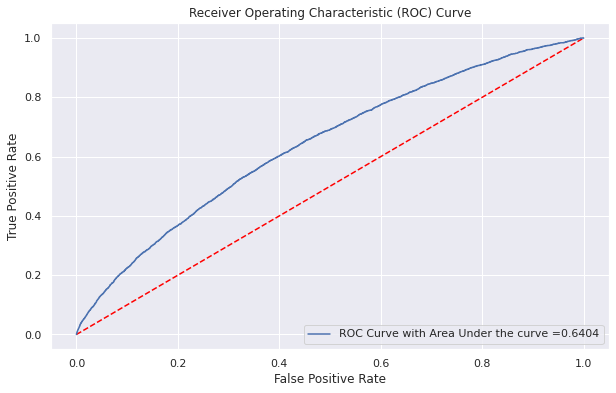

In [ ]:
#plotting ROC Curve with Area under the curve
auc_roc_curve(stack_model)

In [ ]:
# Using Stratified KFold cross validation technique
scores=cross_val_score(stack_model,X_train,y_train,cv=skfold,scoring='roc_auc')
print(np.mean(scores))

0.6352270618253558


In [ ]:
scores

array([0.63597864, 0.63387381, 0.63582874])

Top 4 performing models(logistic,xgb,catboost,lgbm) were stacked using Stacking Classifier model and Logistic regression was used as meta learner for the model which improved the performance little bit.

### Model Comparison Report

##### Performance Metrics Report

In [ ]:
models_list = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Bagging Classifier', \
               'Adaboost Classifier','GradientBoosting Classifier','XGBoost Classifier','CatBoost Classifier',\
               'LGBM Classifier','Stacking Classifier (logistic+xgb+catboost+lgbm)']
train_score = [0.62468,0.56731,0.73856,0.61622,0.96355,0.96367,0.63212,0.63115,0.62751,0.61551]
test_score= [0.62301,0.56769,0.72706,0.61438,0.96355,0.9635,0.63087,0.62887,0.62607,0.61447]
roc_auc_score= [0.63912,0.60594,0.63237,0.63745,0.63522,0.63961,0.6371,0.63756,0.63735,0.64043]
cv_score_3_splits = [0.63395,0.60074,0.62735,'',0.62964,0.63301,0.63158,0.63122,0.63119,0.63522]
df_list = list(zip(models_list,train_score,test_score,roc_auc_score,cv_score_3_splits))
performance_metrics_report = pd.DataFrame(df_list,columns=['Model','train_score','test_score','roc_auc_score','cv_score_3_splits'],index = np.arange(1,11))
performance_metrics_report

,Model,train_score,test_score,roc_auc_score,cv_score_3_splits
1,Logistic Regression,0.62468,0.62301,0.63912,0.63395
2,Decision Tree Classifier,0.56731,0.56769,0.60594,0.60074
3,Random Forest Classifier,0.73856,0.72706,0.63237,0.62735
4,Bagging Classifier,0.61622,0.61438,0.63745,
5,Adaboost Classifier,0.96355,0.96355,0.63522,0.62964
6,GradientBoosting Classifier,0.96367,0.96350,0.63961,0.63301
7,XGBoost Classifier,0.63212,0.63087,0.63710,0.63158
8,CatBoost Classifier,0.63115,0.62887,0.63756,0.63122
9,LGBM Classifier,0.62751,0.62607,0.63735,0.63119
10,Stacking Classifier (logistic+xgb+catboost+lgbm),0.61551,0.61447,0.64043,0.63522


##### Comparing the performance metrics of all models

[Text(0, 0, '0.64043'),
 Text(0, 0, '0.63961'),
 Text(0, 0, '0.63912'),
 Text(0, 0, '0.63756'),
 Text(0, 0, '0.63745'),
 Text(0, 0, '0.63735'),
 Text(0, 0, '0.6371'),
 Text(0, 0, '0.63522'),
 Text(0, 0, '0.63237'),
 Text(0, 0, '0.60594')]

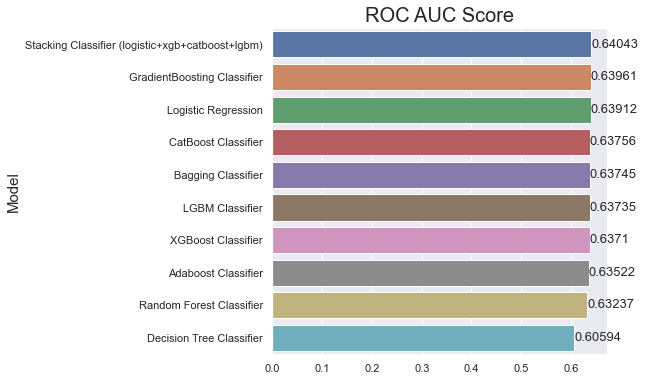

In [ ]:
plt.rcParams["figure.figsize"] =(6,6)
plot_barh = sns.barplot(x = 'roc_auc_score',y = 'Model',data = performance_metrics_report,\
                  order=performance_metrics_report.sort_values('roc_auc_score',ascending = False).Model,orient = 'h')
plot_barh.set_xlabel("", fontsize = 15)
plot_barh.set_ylabel("Model", fontsize = 15)
plot_barh.set_title("ROC AUC Score", fontsize = 20)
plot_barh.bar_label(plot_barh.containers[0], fontsize =13)

### Stacking classifier model is the better model with highest ROC AUC score(0.64043) to predict the probability that a driver will initiate an insurance claim in the following year.

Top 4 performing models(logistic,xgb,catboost,lgbm) were stacked using Stacking Classifier model and Logistic regression was used as meta learner for the model which improved the performance little bit.

#### Stacking Classifier (logistic+xgb+catboost+lgbm) performance metrics

In [ ]:
performance_metrics_report.loc[10]

Model                Stacking Classifier (logistic+xgb+catboost+lgbm)
train_score                                                   0.61551
test_score                                                    0.61447
roc_auc_score                                                 0.64043
cv_score_3_splits                                             0.63522
Name: 10, dtype: object